1. Загружаем необходимые пакеты и библиотеки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

2. Загружаем данные.

In [2]:
data = pd.read_csv('lw4_dataset.csv')
data

,Oven holding time,Furnace temperature,Dough moisture,Baking moisture
0,2.5,180,63,3.1
1,2.5,180,64,3.4
2,2.5,180,65,3.5
3,2.5,180,63,3.2
4,2.5,180,64,3.3
5,2.5,200,65,3.4
6,2.5,200,63,3.2
7,2.5,200,64,3.3
8,2.5,200,65,3.4
9,2.5,200,63,3.2


3. Выполняем разведочный анализ данных.

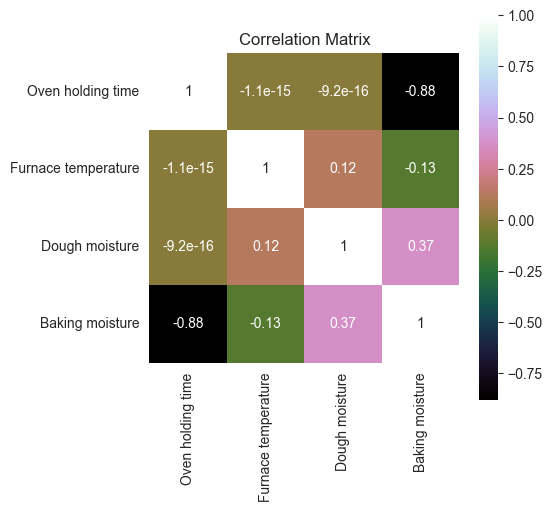

In [3]:
# Построим корреляционную матицу
correlation = data.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [4]:
# Вычислим стандартный коэффициент корреляции между каждой парой атрибутов
corr_matrix = data.corr()
corr_matrix

,Oven holding time,Furnace temperature,Dough moisture,Baking moisture
Oven holding time,1.000000e+00,-1.065814e-15,-9.155377e-16,-0.880366
Furnace temperature,-1.065814e-15,1.000000e+00,1.203859e-01,-0.125767
Dough moisture,-9.155377e-16,1.203859e-01,1.000000e+00,0.373466
Baking moisture,-8.803658e-01,-1.257665e-01,3.734660e-01,1.000000


In [5]:
# Посмотрим, насколько каждый атрибут связан с целевым значением
corr_matrix["Baking moisture"].sort_values(ascending=False)

Baking moisture        1.000000
Dough moisture         0.373466
Furnace temperature   -0.125767
Oven holding time     -0.880366
Name: Baking moisture, dtype: float64

4. Выполняем преобразование данных.

In [6]:
# Преобразовываем данные
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_data = pd.DataFrame(scaler.fit_transform(data))
rescaled_data

,0,1,2,3
0,0.0,0.0,0.0,0.500
1,0.0,0.0,0.5,0.875
2,0.0,0.0,1.0,1.000
3,0.0,0.0,0.0,0.625
4,0.0,0.0,0.5,0.750
5,0.0,1.0,1.0,0.875
6,0.0,1.0,0.0,0.625
7,0.0,1.0,0.5,0.750
8,0.0,1.0,1.0,0.875
9,0.0,1.0,0.0,0.625


5. Разделим исходный датасет на выборку для обучения и выборку для проверки.

In [7]:
test_size = 0.2
seed = 7

rescaled_data_X = rescaled_data.iloc[:, :3]
rescaled_data_Y = rescaled_data[3]

rescaled_data_X_train, rescaled_data_X_test, rescaled_data_Y_train, rescaled_data_Y_test =\
train_test_split(rescaled_data_X, rescaled_data_Y, test_size=test_size, random_state=seed)

6. Обучим модель линейной регрессии и сделаем предсказание с помощью встроенной функции.

In [8]:
model = LinearRegression()
model.fit(rescaled_data_X_train, rescaled_data_Y_train)

rescaled_data_Y_pred_train = model.predict(rescaled_data_X_train)
rmse_train = np.sqrt(mean_squared_error(rescaled_data_Y_train, rescaled_data_Y_pred_train))
r2_train = r2_score(rescaled_data_Y_train, rescaled_data_Y_pred_train)
print("RMSE for Linear Regression for train dataset:", rmse_train)
print("R2_score for Linear Regression for train dataset:", r2_train)
print()

rescaled_data_Y_pred_test = model.predict(rescaled_data_X_test)
rmse_test = np.sqrt(mean_squared_error(rescaled_data_Y_test, rescaled_data_Y_pred_test))
r2_test = r2_score(rescaled_data_Y_test, rescaled_data_Y_pred_test)
print("RMSE for Linear Regression for test dataset:", rmse_test)
print("R2_score for Linear Regression for test dataset:", r2_test)

RMSE for Linear Regression for train dataset: 0.07228743141562011
R2_score for Linear Regression for train dataset: 0.9188491512956359

RMSE for Linear Regression for test dataset: 0.08202527409038798
R2_score for Linear Regression for test dataset: 0.9439868204572867


7. Обучим модель линейной регрессии и сделаем предсказание с помощью самописной функции.

In [9]:
class LinearRegressionSelfWritten:
    def __init__(self, learning_rate=0.01, max_iterations=10000, epsilon=0.0001):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.epsilon = epsilon

    def fit(self, X, y):
        # Добавляем столбец единиц для свободного члена
        X = np.c_[X, np.ones(X.shape[0])]
        # Инициализируем веса случайными значениями
        self.theta = np.random.randn(X.shape[1])
        # Градиентный спуск
        for i in range(self.max_iterations):
            # Вычисляем градиент
            grad = np.dot(X.T, np.dot(X, self.theta) - y) / y.size
            # Обновляем веса
            self.theta -= self.learning_rate * grad
            # Проверяем критерий остановки
            if np.linalg.norm(grad) < self.epsilon:
                break

    def predict(self, X):
        # Добавляем столбец единиц для свободного члена
        X = np.c_[X, np.ones(X.shape[0])]
        # Вычисляем прогноз
        return np.dot(X, self.theta)

    def test_model_significance(self, X, y):
        y_pred = self.predict(X)
        n = X.shape[0]
        p = X.shape[1]
        SSE = np.sum((y - y_pred) ** 2)  # сумма квадратов остатков
        SST = np.sum((y - np.mean(y)) ** 2)  # общая сумма квадратов
        SSR = SST - SSE  # сумма квадратов регрессии
        F = (SSR / (p - 1)) / (SSE / (n - p))  # F-статистика
        p_value = 1 - stats.f.cdf(F, p - 1, n - p)  # p-value
        return p_value

    def test_coefficient_significance(self, X, y):
        y_pred = self.predict(X)
        n = X.shape[0]
        p = X.shape[1]
        SSE = np.sum((y - y_pred) ** 2)  # сумма квадратов остатков
        var = SSE / (n - p)  # оценка дисперсии ошибки
        se = np.sqrt(np.diag(np.linalg.inv(np.dot(X.T, X))) * var)  # стандартные ошибки оценок коэффициентов
        t = self.theta[:-1] / se  # t-статистики
        p_values = (1 - stats.t.cdf(abs(t), n-p)) * 2  # p-values
        return p_values


X_train = np.array(rescaled_data_X_train)
y_train = np.array(rescaled_data_Y_train)
X_test =  np.array(rescaled_data_X_test)
y_test = np.array(rescaled_data_Y_test)

reg = LinearRegressionSelfWritten()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
print("RMSE for Linear Regression for train dataset:", rmse_train)
print("R2_score for Linear Regression for train dataset:", r2_train)
print()

y_pred_test =  reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print("RMSE for Linear Regression for test dataset:", rmse_test)
print("R2_score for Linear Regression for test dataset:", r2_test)
print()

print(reg.test_model_significance(X_test, y_test))
print(reg.test_coefficient_significance(X_test, y_test))

RMSE for Linear Regression for train dataset: 0.07228796251708526
R2_score for Linear Regression for train dataset: 0.9188479588478721

RMSE for Linear Regression for test dataset: 0.0824641704309432
R2_score for Linear Regression for test dataset: 0.9433857922717044

0.23793740296198895
[0.29337172 0.78491129 0.33192362]
